### Plot Tiltmeter single data file

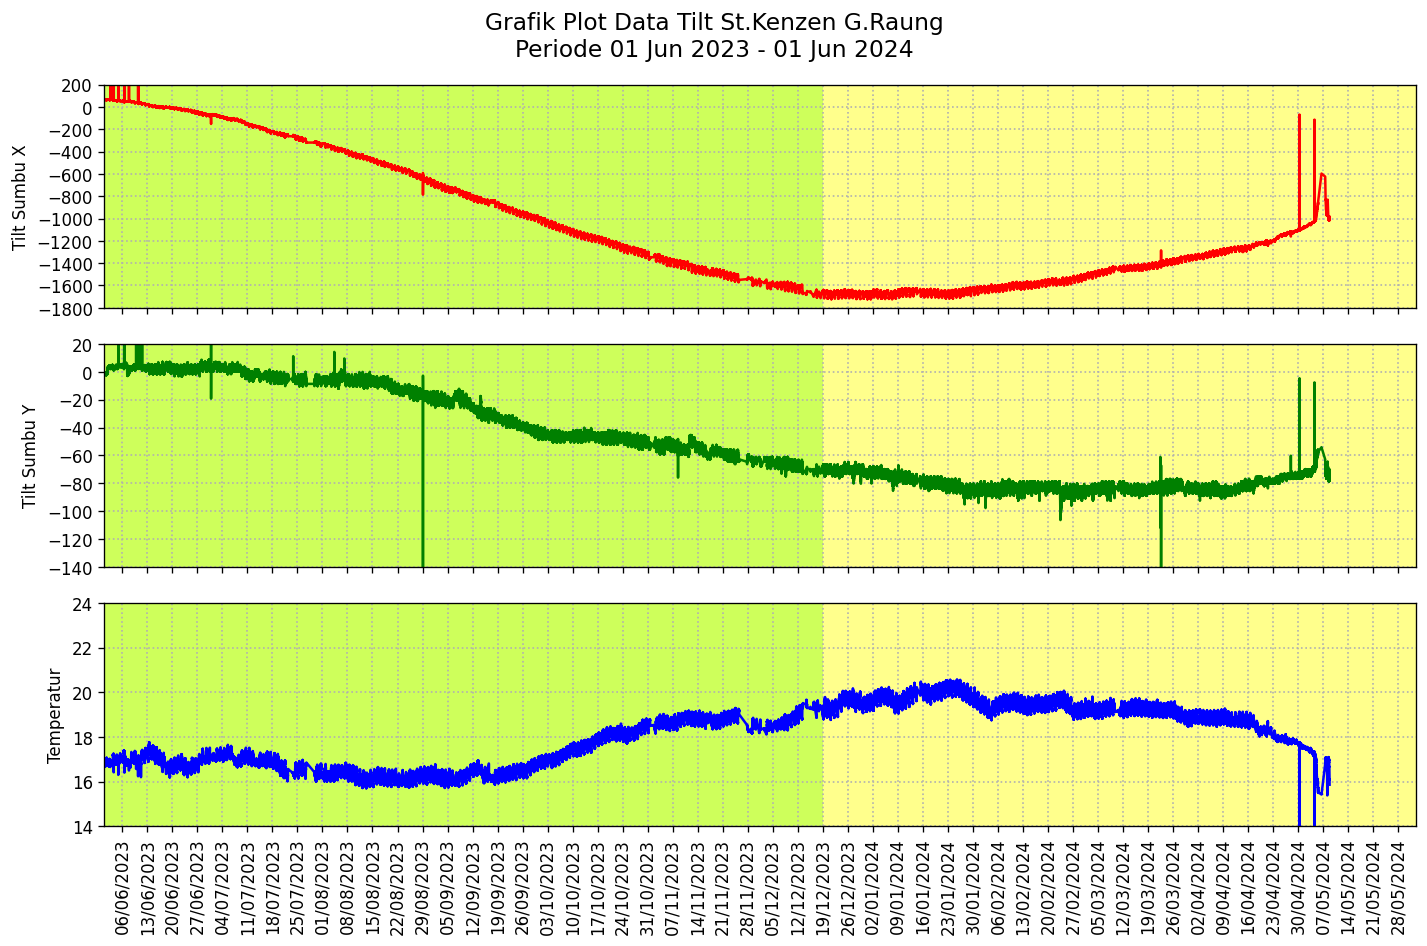

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from matplotlib.dates import DateFormatter
from datetime import datetime, timedelta
import matplotlib.dates as mdates
import matplotlib.ticker as mticker

# Sesuaikan path file
nama_file = r'\\192.189.22.123\data tilt\New Kenzen 29 Mei 2023\Kenzen_est_2023.csv'

# Masukkan parameter nama gunung, nama stasiun, waktu awal, waktu akhir, dan interval axis X
stasiun = 'Kenzen'
gunung = 'Raung'

waktu_awal = '01/06/2023'
waktu_akhir = '01/06/2024'
interval_hari = 7

# Menggabungkan kolom tanggal dan waktu, tidak ada yang perlu diubah
def read_data(filename):
    df = pd.read_csv(filename, sep=' ', header=None, names=['Tanggal', 'Waktu', 'Tilt X', 'Tilt Y', 'Temperatur', 'Temp2'], skiprows=1)
    df['DateTime'] = pd.to_datetime(df['Tanggal'] + ' ' + df['Waktu'], format='%d/%m/%y %H:%M:%S')
    return df[['DateTime', 'Tilt X', 'Tilt Y', 'Temperatur']]


# Fungsi untuk membuat grafik plot
def create_plots(df, start_date, end_date, range_temp, range_tiltX, range_tiltY, axis_interval_tiltX, axis_interval_tiltY, axis_interval_temp):

    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 8), sharex=True, dpi=120)

    # Grafik 1: Nilai sumbu X, tidak ada yang perlu diubah
    ax1.plot(df['DateTime'], df['Tilt X'], color='red')
    ax1.set_ylabel('Tilt Sumbu X')
    ax1.set_ylim(range_tiltX[0], range_tiltX[1])
    ax1.yaxis.set_ticks(range(range_tiltX[0], range_tiltX[1] + 1, axis_interval_tiltX))
    ax1.yaxis.grid(True, linestyle='dotted', linewidth=1)
    ax1.xaxis.grid(True, linestyle='dotted', linewidth=1)

    # Grafik 2: Nilai sumbu Y, tidak ada yang perlu diubah
    ax2.plot(df['DateTime'], df['Tilt Y'], color='green')
    ax2.set_ylabel('Tilt Sumbu Y')
    ax2.set_ylim(range_tiltY[0], range_tiltY[1])
    ax2.yaxis.set_ticks(range(range_tiltY[0], range_tiltY[1] + 1, axis_interval_tiltY))
    ax2.yaxis.grid(True, linestyle='dotted', linewidth=1)
    ax2.xaxis.grid(True, linestyle='dotted', linewidth=1)

    # Grafik 3: Nilai Suhu, tidak ada yang perlu diubah
    ax3.plot(df['DateTime'], df['Temperatur'], color='blue')
    ax3.set_ylabel('Temperatur')
    ax3.set_ylim(range_temp[0], range_temp[1])
    ax3.yaxis.set_ticks(range(range_temp[0], range_temp[1] + 1, axis_interval_temp))
    ax3.yaxis.grid(True, linestyle='dotted', linewidth=1)
    ax3.xaxis.grid(True, linestyle='dotted', linewidth=1)

    # Input interval tanggal pada grafik, interval=1 berarti 1 hari, selin itu tidak ada yang perlu diubah
    days = mdates.DayLocator(interval=interval_hari)
    ax3.xaxis.set_major_locator(days)
    date_formatter = DateFormatter('%d/%m/%Y')
    ax3.xaxis.set_major_formatter(date_formatter)
    plt.xticks(rotation=90)
    end_date += timedelta(days=1)
    ax3.set_xlim(start_date, end_date)
    end_date -= timedelta(days=1)

    title = f'Grafik Plot Data Tilt St.{stasiun} G.{gunung}\nPeriode {start_date.strftime("%d %b %Y")} - {end_date.strftime("%d %b %Y")}'

    plt.suptitle(title, fontsize=14)

    def normal(start, end):
        ax1.axvspan(start, end, facecolor='lime', alpha=0.35)
        ax2.axvspan(start, end, facecolor='lime', alpha=0.35)
        ax3.axvspan(start, end, facecolor='lime', alpha=0.35)

    def waspada(start, end):
        ax1.axvspan(start, end, facecolor='yellow', alpha=0.45)
        ax2.axvspan(start, end, facecolor='yellow', alpha=0.45)
        ax3.axvspan(start, end, facecolor='yellow', alpha=0.45)

    def siaga(start, end):
        ax1.axvspan(start, end, facecolor='orange', alpha=0.5)
        ax2.axvspan(start, end, facecolor='orange', alpha=0.5)
        ax3.axvspan(start, end, facecolor='orange', alpha=0.5)

    def awas(start, end):
        ax1.axvspan(start, end, facecolor='red', alpha=0.55)
        ax2.axvspan(start, end, facecolor='red', alpha=0.55)
        ax3.axvspan(start, end, facecolor='red', alpha=0.55)

    # Memberi warna background sesuai status, ganti tanggal perubahan status sesuai histori, hapus/comment baris yang tidak perlu
    normal(pd.to_datetime('02/05/2023', format='%d/%m/%Y'), pd.to_datetime('19/12/2023', format='%d/%m/%Y'))
    waspada(pd.to_datetime('19/01/2023', format='%d/%m/%Y'), pd.to_datetime('02/06/2024', format='%d/%m/%Y'))
    # siaga(pd.to_datetime('14/07/2023', format='%d/%m/%Y'), pd.to_datetime('21/07/2023', format='%d/%m/%Y'))
    # awas(pd.to_datetime('21/07/2023', format='%d/%m/%Y'), pd.to_datetime('31/07/2023', format='%d/%m/%Y'))

    plt.tight_layout()
    plt.show()

# Program utama
filename = nama_file
df = read_data(filename)

# Ubah tanggal awal dan akhir plot yang diinginkan
start_date = pd.to_datetime(waktu_awal, format='%d/%m/%Y')
end_date = pd.to_datetime(waktu_akhir, format='%d/%m/%Y')

# Input rentang dan interval pada sumbu y sesuai kebutuhan, range untuk nilai minimum dan maksimum, interval untuk interval
minimum_suhu = 14
maksimum_suhu = 24
interval_suhu = 2

minimum_sumbu_X = -1800
maksimum_sumbu_X = 200
interval_sumbu_X = 200

minimum_sumbu_Y = -140
maksimum_sumbu_Y = 20
interval_sumbu_Y = 20

range_temp = (minimum_suhu, maksimum_suhu)
axis_interval_temp = interval_suhu

range_tiltX = (minimum_sumbu_X, maksimum_sumbu_X)
axis_interval_tiltX = interval_sumbu_X

range_tiltY = (minimum_sumbu_Y, maksimum_sumbu_Y)
axis_interval_tiltY = interval_sumbu_Y

create_plots(df, start_date, end_date, range_temp, range_tiltX, range_tiltY, axis_interval_tiltX, axis_interval_tiltY, axis_interval_temp)


# @mukijo, 2023
# 0856-4334-6785

In [2]:
df.tail(10)

,DateTime,Tilt X,Tilt Y,Temperatur
430171,2024-05-08 19:29:00,-987.7469,-71.55849,15.97938
430172,2024-05-08 19:30:00,-986.1112,-71.55849,15.97063
430173,2024-05-08 19:31:00,-986.1112,-71.55849,15.97938
430174,2024-05-08 19:32:00,-986.0021,-71.44941,15.96875
430175,2024-05-08 19:33:00,-984.3654,-69.92229,15.95000
430176,2024-05-08 19:34:00,-984.2563,-71.55849,15.94875
430177,2024-05-08 19:35:00,-982.6206,-71.44941,15.92875
430178,2024-05-08 19:36:00,-982.5115,-69.92229,15.90813
430179,2024-05-08 19:37:00,-980.9842,-71.55849,15.87875
430180,2024-05-08 19:38:00,-982.5115,-71.55849,15.85812
